In [260]:
#Important Headers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import random

warnings.filterwarnings('ignore') 

In [261]:
#Reading the csv file
random.seed(4321)
df = pd.read_csv('RecordLabelSpotifyDB.csv')
df.head()


,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,Who Do You Love?,Terrell Hines,modern alternative pop,2021,2022‑04‑12,120,73,71,-8,17,44,211,29,5,11
1,lost (feat. Caamp),paris jackson,indie folk,2022,2022‑08‑25,136,35,59,-12,11,20,175,94,3,32
2,Serial Heartbreaker,FLETCHER,alt z,2022,2022‑11‑10,170,87,59,-4,24,52,133,11,7,67
3,Heaven,Calum Scott,neo mellow,2022,2022‑05‑06,128,35,57,-8,11,39,194,52,3,65
4,Hard Working Man,Marcus King,modern blues rock,2022,2022‑09‑26,128,72,50,-5,64,71,217,3,10,50


In [262]:
#Present the data's info
df.info

<bound method DataFrame.info of                     title           artist                top genre  year  \
0        Who Do You Love?    Terrell Hines   modern alternative pop  2021   
1      lost (feat. Caamp)    paris jackson               indie folk  2022   
2     Serial Heartbreaker         FLETCHER                    alt z  2022   
3                  Heaven      Calum Scott               neo mellow  2022   
4        Hard Working Man      Marcus King        modern blues rock  2022   
...                   ...              ...                      ...   ...   
1437              The One         FLETCHER                    alt z  2020   
1438           Turn Me On      Norah Jones  contemporary vocal jazz  2002   
1439             Forfeit.       Kiana Ledé                chill r&b  2022   
1440  Destination Unknown  Missing Persons             new romantic  1982   
1441                  Shy            Mabel                dance pop  2022   

           added  bpm  nrgy  dnce  dB  live

In [192]:
#Checking if there are any null values
df.isnull().sum()

title         0
artist        0
top genre    90
year          0
added         0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

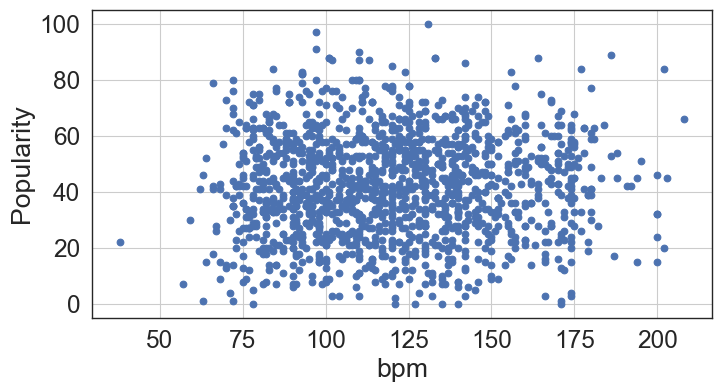

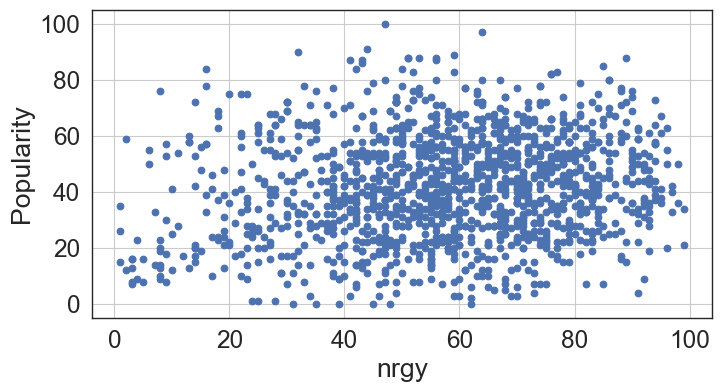

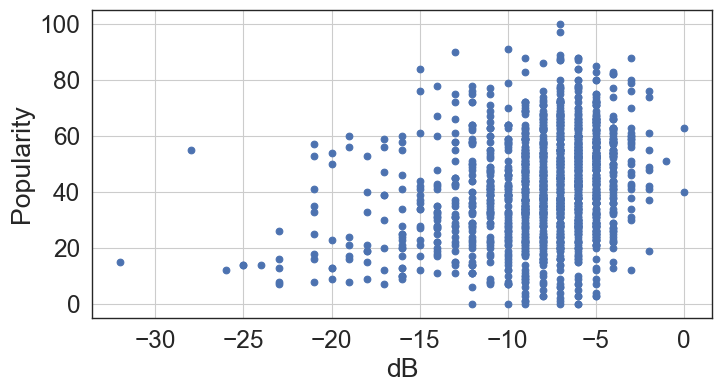

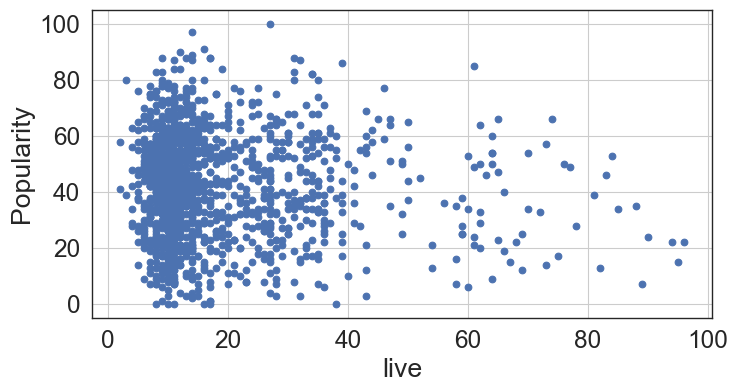

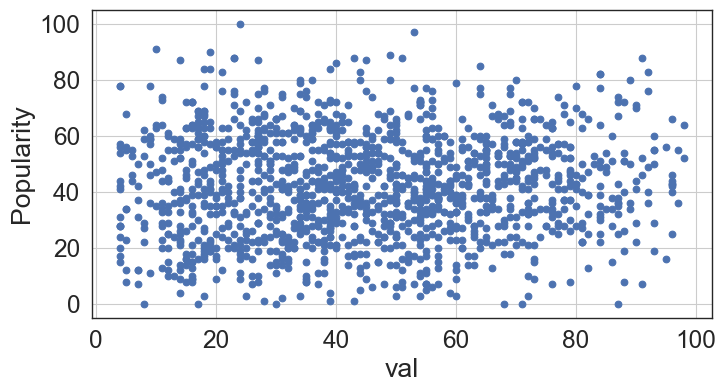

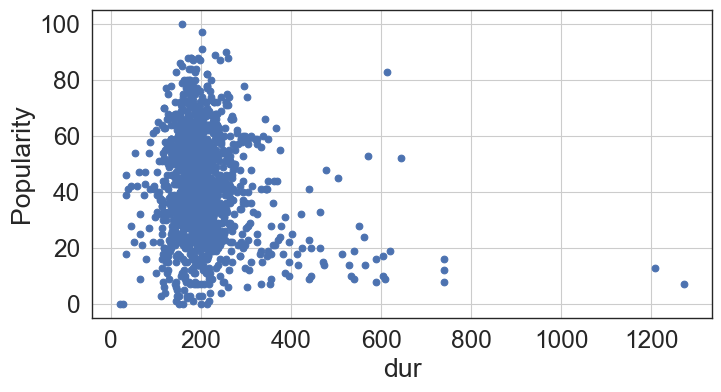

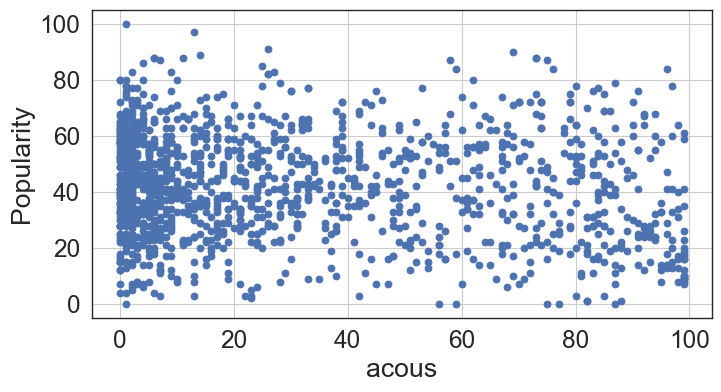

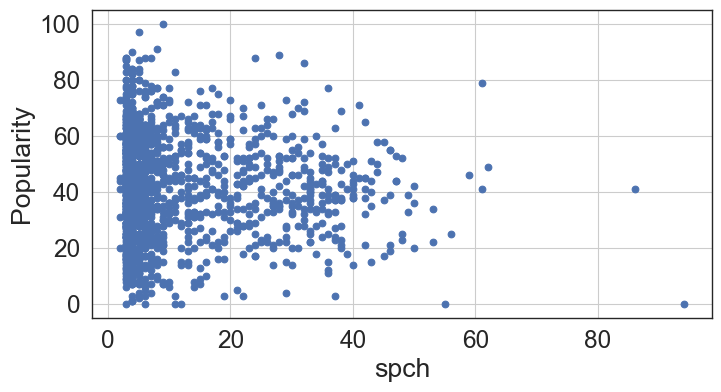

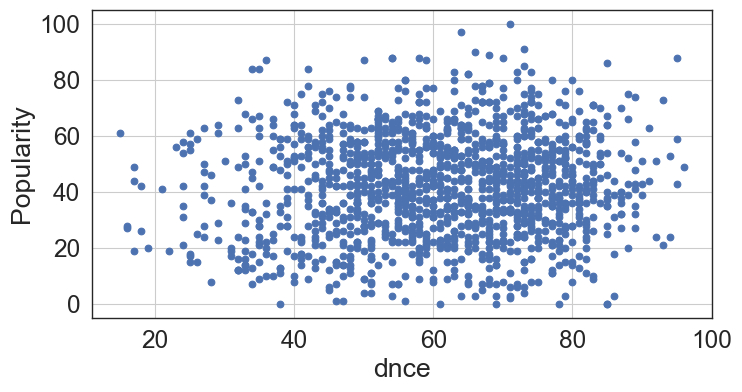

In [263]:
import seaborn as sb

category1 = ["bpm","nrgy","dB","live", "val", "dur", "acous", "spch", "dnce"]
for c in category1:
    plt.figure(figsize=(8,4))
    plt.rcParams['figure.dpi'] = 100
    plt.grid(True)
    plt.subplots_adjust(hspace = 1)
    plt.scatter(df[c], df['pop'], marker = 'o')
    plt.xlabel(c)
    plt.ylabel("Popularity")
    plt.show()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,2018.518724,120.183773,57.706657,60.951456,-8.117198,17.920250,45.427184,203.834951,31.037448,11.593620,42.172677
std,10.505212,29.872088,20.722095,15.208945,3.671371,14.042758,22.421099,84.155761,31.228090,11.907516,18.381681
min,1951.000000,38.000000,1.000000,15.000000,-32.000000,2.000000,4.000000,20.000000,0.000000,2.000000,0.000000
25%,2020.000000,96.000000,45.000000,50.000000,-9.000000,10.000000,27.000000,166.000000,4.000000,4.000000,29.000000
50%,2022.000000,118.000000,59.000000,62.000000,-7.000000,12.000000,44.000000,190.000000,19.000000,6.000000,42.000000
75%,2022.000000,140.000000,73.000000,73.000000,-6.000000,21.000000,62.000000,221.000000,56.000000,15.000000,55.000000
max,2022.000000,208.000000,99.000000,96.000000,0.000000,96.000000,98.000000,1272.000000,99.000000,94.000000,100.000000


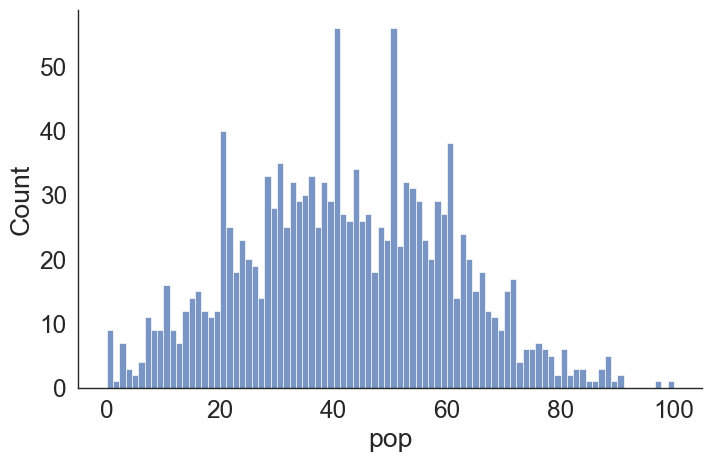

In [264]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="pop", kind="hist", bins = 90, aspect = 1.5)

df.describe()

In [265]:
from pandas import DataFrame

df.loc[df['pop'] >= 46.0, 'popularity'] = 1
df.loc[df['pop'] < 46.0, 'popularity'] = 0

df.drop('pop', inplace=True, axis=1)
df["popularity"].value_counts()



0.0    822
1.0    620
Name: popularity, dtype: int64

In [266]:
df.drop('title', inplace=True, axis=1)
df.drop('artist', inplace=True, axis=1)
df.drop('top genre', inplace=True, axis=1)
df.drop('year', inplace=True, axis=1)
df.drop('added', inplace=True, axis=1)

df


,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,120,73,71,-8,17,44,211,29,5,0.0
1,136,35,59,-12,11,20,175,94,3,0.0
2,170,87,59,-4,24,52,133,11,7,1.0
3,128,35,57,-8,11,39,194,52,3,1.0
4,128,72,50,-5,64,71,217,3,10,1.0
...,...,...,...,...,...,...,...,...,...,...
1437,115,63,76,-6,9,65,182,21,22,1.0
1438,171,18,43,-11,10,49,155,86,6,1.0
1439,132,44,77,-8,9,37,242,51,13,0.0
1440,121,53,70,-14,6,27,217,2,5,1.0


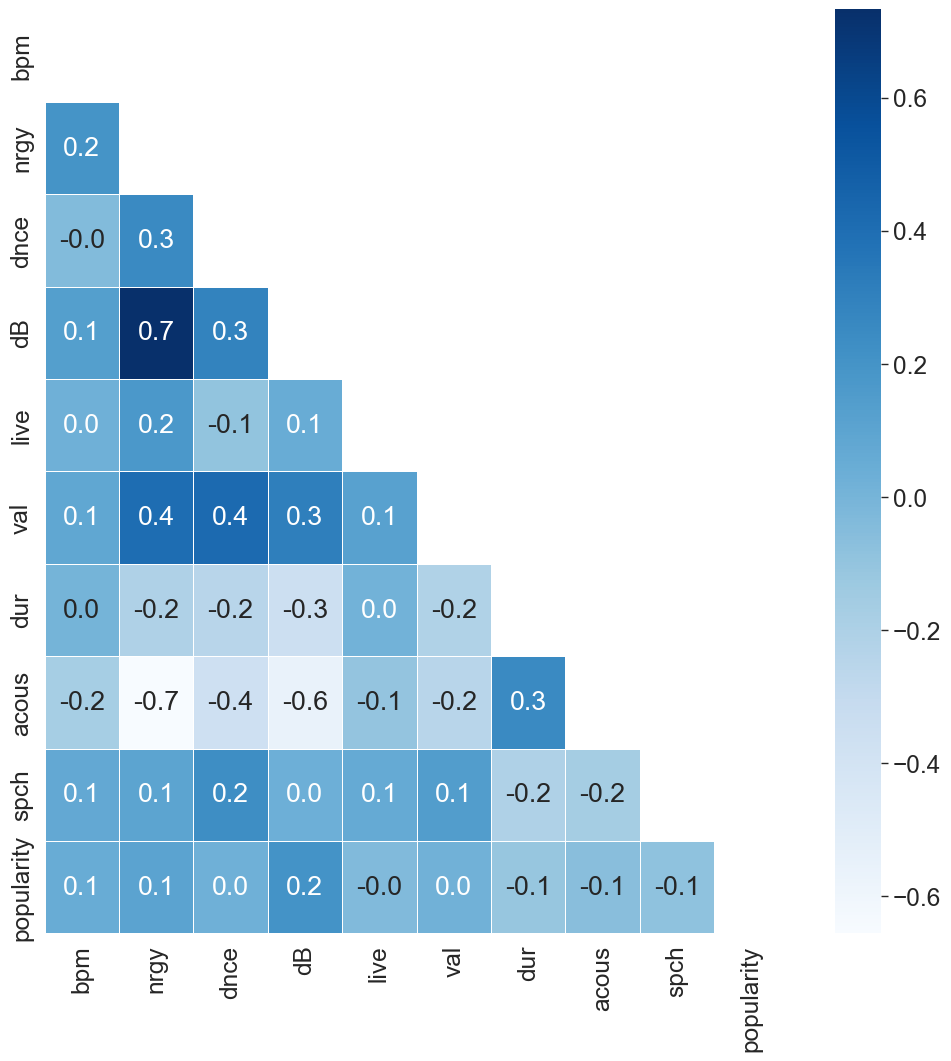

In [267]:
#Correlation Coefficient 
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

In [202]:
#Present the data
df.describe()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,120.329882,58.202663,61.091716,-8.049556,17.943047,45.627959,206.048077,30.201183,11.784024,0.440828
std,29.767926,20.482747,15.036364,3.666892,14.153139,22.383936,85.735931,30.985793,12.055415,0.496670
min,38.000000,1.000000,15.000000,-32.000000,2.000000,4.000000,20.000000,0.000000,2.000000,0.000000
25%,96.000000,46.000000,51.000000,-9.000000,10.000000,28.000000,166.000000,4.000000,4.000000,0.000000
50%,120.000000,59.000000,62.000000,-7.000000,12.000000,44.000000,191.000000,17.000000,6.000000,0.000000
75%,140.000000,73.250000,73.000000,-6.000000,21.000000,62.250000,223.000000,52.250000,15.250000,1.000000
max,208.000000,99.000000,96.000000,0.000000,96.000000,98.000000,1272.000000,99.000000,94.000000,1.000000


In [269]:
#Standard Scaling for feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
 
# To scale data
scaler.fit(df)


StandardScaler()

In [270]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [272]:
df = df_scaled
df.describe()



,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
count,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03
mean,-3.670634e-17,-4.311147e-17,-1.412414e-17,-2.791981e-17,4.844908e-18,3.596728e-17,-1.231756e-17,-3.120449e-17,1.387779e-16,4.631404e-17
std,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00
min,-2.766748e+00,-2.793758e+00,-3.066484e+00,-6.533954e+00,-1.126884e+00,-1.860413e+00,-2.170816e+00,-9.750391e-01,-8.118878e-01,-8.878963e-01
25%,-8.176211e-01,-5.959737e-01,-6.714023e-01,-2.592919e-01,-5.614293e-01,-7.878186e-01,-4.672825e-01,-8.458999e-01,-6.459258e-01,-8.878963e-01
50%,-1.108588e-02,3.894167e-02,6.042818e-02,2.863309e-01,-4.200656e-01,-7.275579e-02,-1.755815e-01,-4.261975e-01,-4.799639e-01,-8.878963e-01
75%,6.610268e-01,7.349066e-01,7.922587e-01,5.591423e-01,2.160711e-01,7.428627e-01,1.977957e-01,7.118416e-01,2.876101e-01,1.126258e+00
max,2.946210e+00,1.992527e+00,2.322450e+00,2.196011e+00,5.517210e+00,2.340581e+00,1.243757e+01,2.221156e+00,6.822361e+00,1.126258e+00


In [212]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Splitting data into X and y
X = df.iloc[1:1352,1:9].values
y = df.iloc[1:1352,9].values
X.shape
y.shape

(1351,)

In [213]:
#Splitting X values into training and tesitng data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


In [259]:
#Model learning with default parameters
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import learning_curve    

lg = LogisticRegression(penalty='none')
# fit
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.60


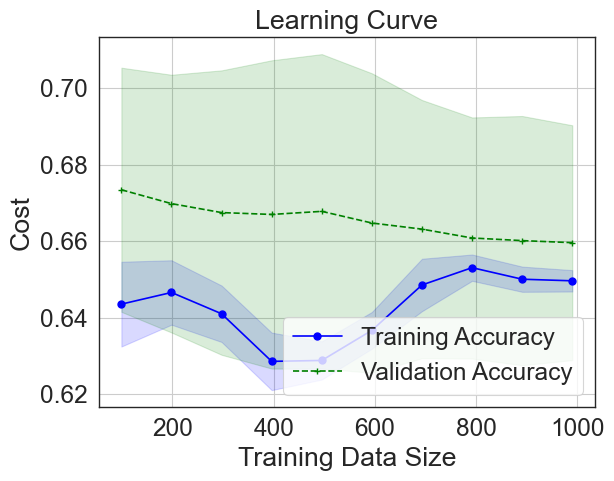

In [220]:
    
#Learning Curve with non tuned parameters
    train_sizes, train_scores, test_scores = learning_curve(estimator=lg, X=X_train, y=y_train,
                                                       cv=12, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1, scoring='neg_log_loss')
#
# Calculate training and test mean and std
#
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Cost')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [223]:
#Logistic regression after hyper tuning
finallg = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')
finallg.fit(X_train, y_train)
y_pred = finallg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(finallg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.60


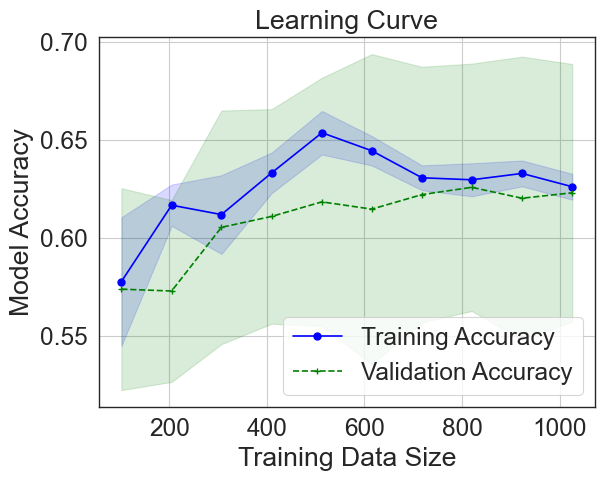

In [255]:
#Calculating and plotting the accuracy vs training examples learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator=LogisticRegression(C=1.0, penalty='l2', solver='liblinear'), X=X_train, y=y_train,
                                                       cv=20, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

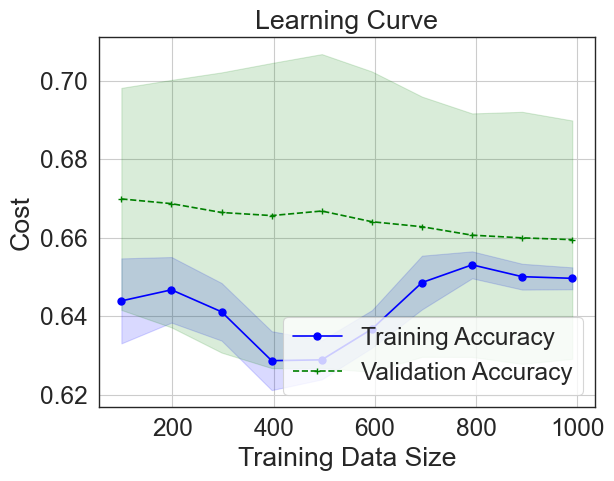

In [224]:
#Calculating and plotting the cost vs training exmaples learning curve

    
train_sizes, train_scores, test_scores = learning_curve(estimator=finallg, X=X_train, y=y_train,
                                                       cv=12, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1, scoring='neg_log_loss')
#
# Calculate training and test mean and std
#
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Cost')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [225]:
#Precision and Recall Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      0.70      0.67       156
           1       0.53      0.47      0.50       115

    accuracy                           0.60       271
   macro avg       0.59      0.58      0.58       271
weighted avg       0.60      0.60      0.60       271



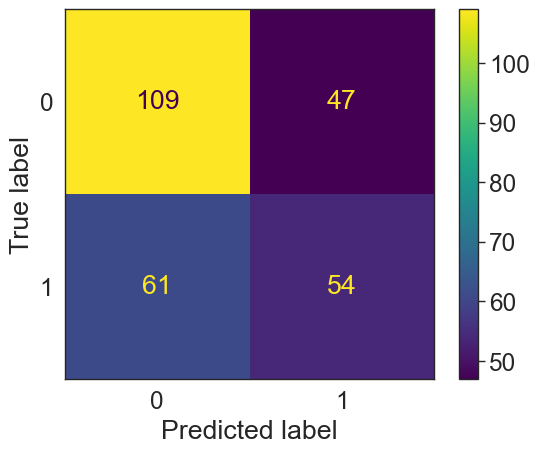

In [226]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=finallg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=finallg.classes_)
disp.plot()

plt.show()

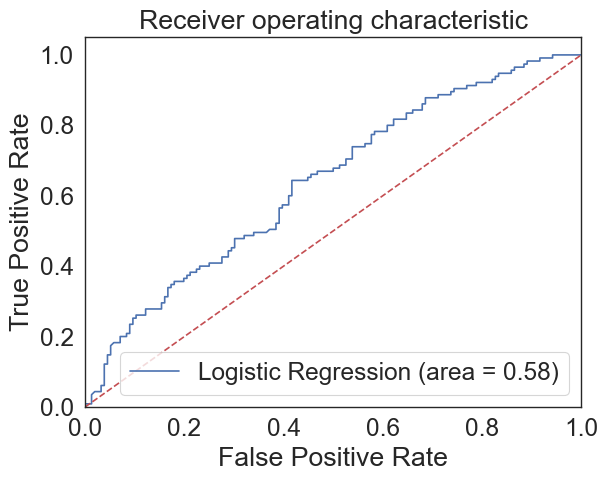

In [227]:
#Plotting the ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, finallg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, finallg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [228]:
#Using SVC
from sklearn.svm import SVC
svm= SVC(random_state=1)  #kernel='rbf'
svm.fit(X_train,y_train)
print("Train accuracy of svm algo:",svm.score(X_train,y_train))
print("Test accuracy of svm algo:",svm.score(X_test,y_test))

Train accuracy of svm algo: 0.6731481481481482
Test accuracy of svm algo: 0.6088560885608856


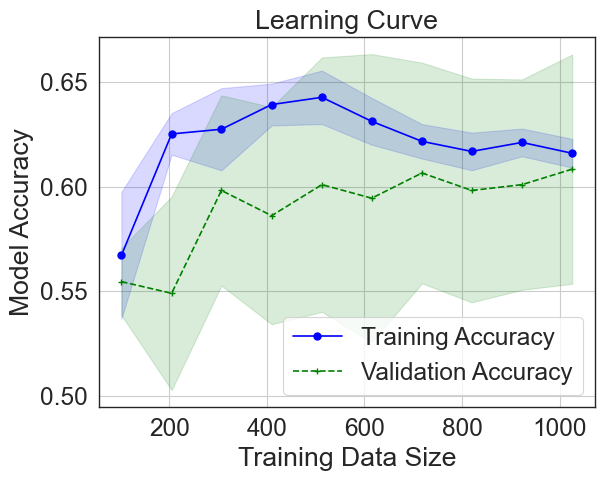

In [257]:
#Calculating and plotting the accuracy vs training exmaples learning curve


train_sizes, train_scores, test_scores = learning_curve(estimator=SVC(gamma=0.01, C=10, kernel = 'sigmoid', probability=True), X=X_train, y=y_train,
                                                       cv=20, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()



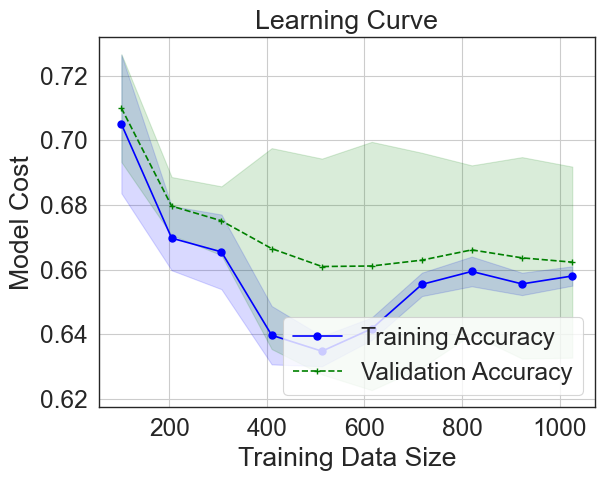

In [237]:
#Calculating and plotting the Cost vs training examples learning curve


train_sizes, train_scores, test_scores = learning_curve(estimator=SVC(gamma=0.01, C=10, kernel = 'sigmoid', probability=True), X=X_train, y=y_train,
                                                       cv=20, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=1, scoring='neg_log_loss')
#
# Calculate training and test mean and std
#
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model Cost')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [173]:
#SVM after Hypertuning
svm_final = SVC(gamma=0.01, C=10, kernel = 'sigmoid', probability=True)
svm_final.fit(X_train, y_train)
y_pred = svm_final.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(svm_final.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.59


In [174]:
#Precision and Recall Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       156
           1       0.52      0.51      0.52       115

    accuracy                           0.59       271
   macro avg       0.58      0.58      0.58       271
weighted avg       0.59      0.59      0.59       271



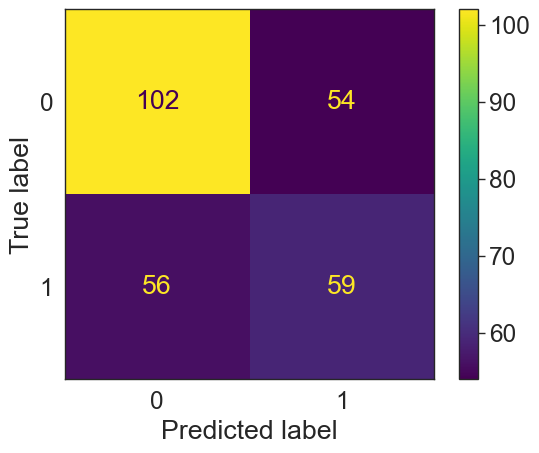

In [175]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=svm_final.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm_final.classes_)
disp.plot()

plt.show()

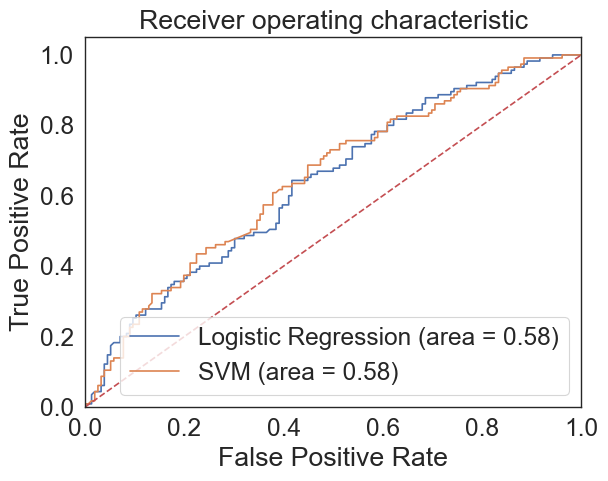

<Figure size 640x480 with 0 Axes>

In [252]:
#ROC Curve of Logisitic Regression and SVM combined
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
svm_roc_auc = roc_auc_score(y_test, svm_final.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm_final.predict_proba(X_test)[:,1])

logit_roc_auc = roc_auc_score(y_test, finallg.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, finallg.predict_proba(X_test)[:,1])
#plt.figure()
plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#plt.plot(fpr1, tpr1)




plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
#plt.plot(fpr, tpr)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.figure()


plt.show()